In [29]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import scipy.stats as stat
import pylab

In [30]:
def load_data():
    df=pd.read_csv(r"C:\Users\prati\Downloads\data (1).csv")
    return df

# 1. Descriptive statistics
The study of numerical and graphical ways to describe and display your data is called descriptive statistics. It describes the data and helps us understand the features of the data by summarizing the given sample set or population of data. In descriptive statistics, we usually take the sample into account.
![](https://editor.analyticsvidhya.com/uploads/65116Copy%20of%20sale.png)
Statisticians use graphical representation of data to get a clear picture of the data. Business trends can be analyzed easily with these representations. visual representation is more effective than presenting huge numbers.
We can describe these data in various dimensions. Various dimensions of describing data are

>- **Central Tendency of Data**

>- **Dispersion of Data**

>- **Shape of the Data**

## 1. Central Tendency Of Data
This is the center of the distribution of data. It describes the location of data and concentrates where the data is located.<br>
The three most widely used measures of the “center” of the data are

    1.1 Mean

    1.2 Median

    1.3 Mode
    
    
![CentralTendencyofData](https://editor.analyticsvidhya.com/uploads/17591Copy%20of%20Untitled.png)

#### 1.1 Mean
The “Mean” is the **average** of the data.<br>
**Average** can be identified by summing up all the numbers and then dividing them by the number of observation.

> Mean = X1 + X2 + X3 +… +  Xn / n

**Example:** 
>Data – 10,20,30,40,50<br>Number of observations = 5<br>
>Mean = [ 10+20+30+40+50 ] / 5<br>
>Mean = 30

***Outliers*** influence the central tendency of the data.

#### <u> What are Outliers?<u>
>Outliers are extreme behaviours. An outlier is a data point that differs significantly from other observations. It can cause serious problems in analysis.
![Mean](https://editor.analyticsvidhya.com/uploads/67423Copy%20of%20Untitled%20(1).png)

**Example :**

>Data – 10,20,30,40,200<br>
>Mean = [ 10+20+30+40+200 ] / 5<br>
>Mean = 60<br>

Solution for Outliers problem <br>
>***Removing*** the outliers while taking average will give us good results.<br>
#### 1.2 Median
Median is the 50%th percentile of the data. It is exactly the ***center point*** of the data.

Median can be identified by ordering the data and splits the data into two equal parts and find the number. It is the best way to find the center of the data.

Because the central tendency of the data is not affected by outliers. Outliers don’t influence the data.
![Median](https://editor.analyticsvidhya.com/uploads/38204Copy%20of%20Untitled%20(2).png)
    
**Example:**
>Odd number of Data – 10,20,30,40,50 <br>
>Median is 30.<br>

>Even number of data – 10,20,30,40,50,60<br>
>Find the middle 2 data and take the mean of that two values.<br>
>Here 30 and 40 are middle values.<br>
>30+40 / 2  = 35 <br>
      >Median is 35
    
    
    
#### 1.3 Mode
Mode is frequently occurring data or elements.

If an element occurs the highest number of times, it is the mode of that data. If no number in the data is repeated, then there is no mode for that data. There can be more than one mode in a dataset if two values have the same frequency and also the highest frequency.

Outliers don’t influence the data.

The mode can be calculated for both quantitative and qualitative data.
![MODE](https://editor.analyticsvidhya.com/uploads/56718Copy%20of%20Untitled%20(3).png)
    
**Example**
>Data – 1,3,4,6,7,3,3,5,10,3<br>
>Mode is 3<br>
>because 3 has the highest frequency ( 4 times)

In [31]:
df = load_data()
df.head(25)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [32]:
df.shape
# rows = 50
# colomns = 7

(50, 7)

Finding the mean of [ Mnthly_HH_income ] using Pandas

In [33]:

df[['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income','No_of_Earning_Members']].mean().round()

Mthly_HH_Income           41558.0
Mthly_HH_Expense          18818.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt            3060.0
Annual_HH_Income         490019.0
No_of_Earning_Members         1.0
dtype: float64

Calculating the median using pandas.

In [34]:
df[['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income','No_of_Earning_Members']].median()

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

Finding the Mode using Pandas .


In [35]:
df[['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income','No_of_Earning_Members']].mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,45000,25000,4,0,590400,1


# 2. Dispersion of Data
![](https://editor.analyticsvidhya.com/uploads/31580Copy%20of%20Untitled%20(4).png)
The dispersion is the ***“Spread of the data”***. It measures how far the data is spread.

In most of the dataset, the data values are closely located near the mean. On some other dataset, the values are widely spread out of the mean. These dispersions of data can be measured by 

    2.1 Standard Deviation
    2.2 Variance
Let us see these measures in detail,

#### 2.1 Standard Deviation
The most common measure of spread is the standard deviation.

The Standard deviation is the measure of ***how far the data deviates*** from the ***mean value***.

The standard deviation formula varies for population and sample. Both formulas are similar, but not the same.

> - Symbol used for Sample Standard Deviation  –  “s” (lowercase)
> - Symbol used for Population Standard Deviation – “σ” (sigma, lower case)

***Steps to find ***Standard deviation***

If x is a number, then the difference “x – mean” is its deviation. The deviations are used to calculate the standard deviation.

> - ***Sample Standard Deviation, s  = Square root of sample variance***
> - ***Sample Standard Deviation, s = Square root of***   [Σ(x − x ¯ )2/ n-1]   

where ***x***  is ***average*** and ***n*** is  ***no. of samples***


![Standard deviation](https://editor.analyticsvidhya.com/uploads/80215Copy%20of%20Untitled%20(7).png)
Standard Deviation for sample

>***Population Standard Deviation, σ = Square root of population variance***
>***Population Standard Deviation, σ = Square root of***  [ Σ(x − μ)2 / N ] where μ is Mean and N is no.of population.


![standard deviation for population](https://editor.analyticsvidhya.com/uploads/70753Copy%20of%20Untitled%20(6).png)
The standard deviation is always positive or zero. It will be large when the data values are spread out from the mean.

#### 2.4 Variance
The variance is a measure of variability. It is the ***average squared deviation from the mean.***

The symbol σ2 represents the population variance and the symbol for s2 represents sample variance.

>***Population variance   $σ^2$*** =  [ Σ(x − μ)2 / N ]<br>
>***Sample Variance  $s^2$***  =  [ Σ(x − x ¯ )2/ n-1 ]

![](https://editor.analyticsvidhya.com/uploads/24765Copy%20of%20Untitled%20(8).png)


# 3. Shape of the Data
The shape describes the type of the graph.

The shape of the data is important because making a decision about the probability of data is based on its shape.
![](https://editor.analyticsvidhya.com/uploads/57820Copy%20of%20Untitled%20(9).png)
**The shape of the data** can be measured by two methodologies.

 >3.1 Symmetric<br>
 >3.2 Skewness<br>
 >3.3 Kurtosis<br>

Let us discuss in detail,

#### 3.1 Symmetric
In the symmetric shape of the graph, the data is distributed the same on both sides.<br>
In symmetric data, the mean and median are located close together.
![symmetric](https://editor.analyticsvidhya.com/uploads/61915Copy%20of%20Untitled%20(10).png)
The curve formed by this symmetric graph is called a normal curve.

#### 3.2 Skewness
Skewness is the measure of the asymmetry of the distribution of data.<br>
The data is not symmetrical (i.e) it is skewed towards one side.<br>

Skewness is classified into two types.

   >3.2.1. Positive Skew<br>
   >3.2.2. Negative Skew<br>

let us see that,

   >1.Positively skewed<br>
    In a Positively skewed distribution, the data values are clustered around the left side of the distribution and the right side is longer.<br>
    The mean and median will be greater than the mode in the positive skew.<br>
   >2.Negatively skewed<br>
    In a Negatively skewed distribution, the data values are clustered around the right side of the distribution and the left side is longer.<br>The mean and median will be less than the mode.<br>
    
![symmetric](https://editor.analyticsvidhya.com/uploads/90404Copy%20of%20Untitled%20(11).png)

#### 3.3 Kurtosis
Kurtosis is the measure of describing the distribution of data.

This data is distributed in different ways. They are,

    1. Platykurtic
    2. Mesokurtic
    3. Leptokurtic

Let us discuss in detail,

1. <u>Platykurtic</u><br>
The platykurtic shows a distribution with flat tails. Here the data is distributed faltly . The flat tails indicated the small outliers in the distribution.
![](https://editor.analyticsvidhya.com/uploads/43196Copy%20of%20Untitled%20(13).png)
2. <u>Mesokurtic</u><br>
In Mesokurtic, the data is widely distributed. It is normally distributed and it also matches normal distribution.
![](https://editor.analyticsvidhya.com/uploads/29522Copy%20of%20Untitled%20(14).png)
3. <u>Leptokurtic</u><br>
In leptokurtic, the data is very closely distributed. The height of the peak is greater than width of the peak.
![](https://editor.analyticsvidhya.com/uploads/63987Copy%20of%20Untitled%20(15).png)


### Differences
![](https://editor.analyticsvidhya.com/uploads/29049Copy%20of%20Untitled%20(12).png)


In [36]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


Finding the Variance without In-Built Functions

In [37]:
mean = df['Annual_HH_Income'].mean()
total = 0
for i in df['Annual_HH_Income']:
    a = i - mean
    sq = a * a
    total = total + sq
python_var = total / len(df['Annual_HH_Income'])
python_var

100437186889.95831

In [38]:
df[['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income','No_of_Earning_Members']].var()

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

Standard Deviation using Pandas.

In [39]:
df[['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income','No_of_Earning_Members']].std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

In [40]:
df.corr()


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


<AxesSubplot:>

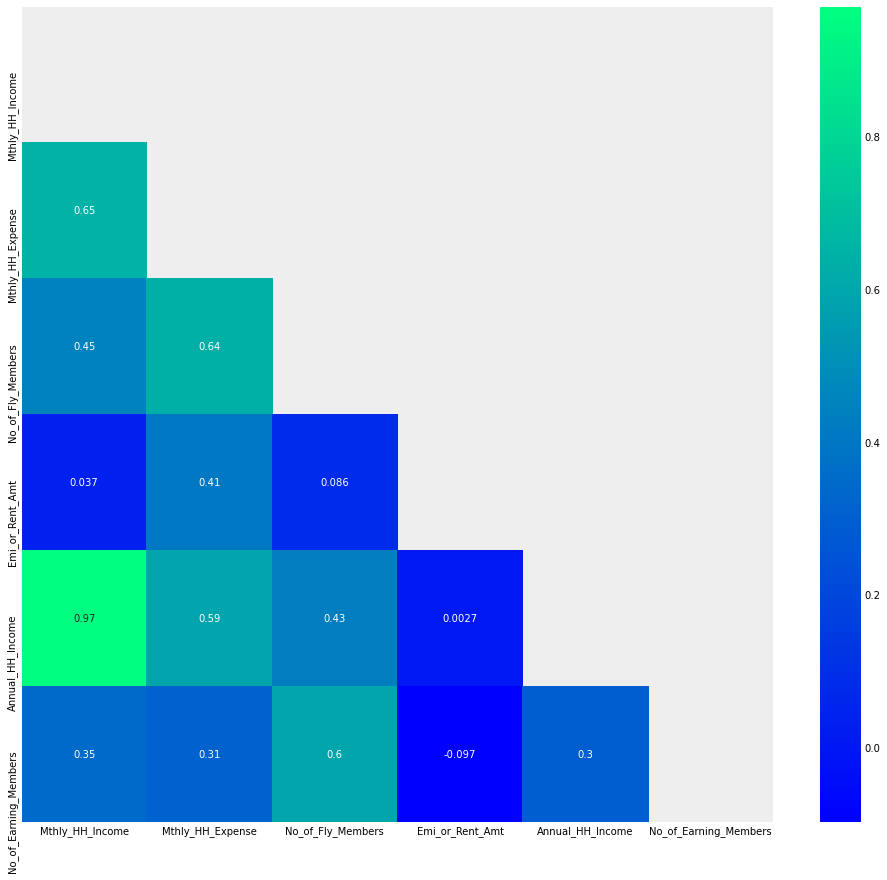

In [41]:
plt.figure(figsize=(15,15))
plt.style.use("bmh")
mask = np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,cmap="winter",annot=True)

<AxesSubplot:xlabel='Annual_HH_Income', ylabel='Mthly_HH_Income'>

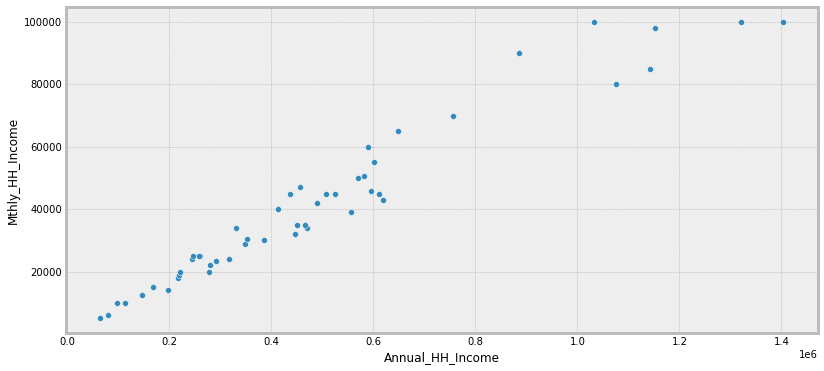

In [42]:
plt.figure(figsize=(12,6))
plt.style.use("bmh")
sns.scatterplot(df['Annual_HH_Income'],df["Mthly_HH_Income"],palette="inferno",markers="O")

In [43]:
def standard_deviation(x):
    length = len(x)
    mean = sum(x) / len(x)
    total = 0
    for i in x:
        a = (i - mean) ** 2
        total = total + a
    std = (total / length) ** 0.5
    return std

def covariance(x,y):
    total = 0
    mean_x = x.mean()
    mean_y = y.mean()
    for i in range(len(x)):
        sum_x_y = (x[i] - mean_x) * ( y[i] - mean_y) 
        total = total + sum_x_y
    cov = total / len(x)
    return cov


def correlation(x,y):
    cov = covariance(x,y)
    x_std = standard_deviation(x)
    y_std = standard_deviation(y)
    corr = cov / (x_std * y_std)
    return corr

In [44]:
covariance(df['Mthly_HH_Income'],df['Annual_HH_Income'])

7944726511.680006

# Normal Distribution
#### What is Normal Distribution?
    The Normal distribution is also known as Gaussian or Gauss distribution. Many groups follow this type of pattern. That’s why it’s widely used in business, statistics, and in government bodies like the FDA:
    - Heights of people.
    - Measurement errors.
    - Blood pressure.
    - Points on a test.
    - IQ scores.
    - Salaries.
#### Why is Normal Distribution Important?
    There are several reasons why the normal distribution is crucial in statistics. Some of those are as follows:

    1. The statistical hypothesis test assumes that the data follows a normal distribution.

    2. Both linear and non-linear regression assumes that the residual follows the normal distribution.

    3. Moreover, the central limit theorem states that as the sample size increases the distribution of the mean follows normal distribution irrespective of the distribution of the original variable

    4. Apart from this most of the statistical software programs support some of the probability functions for normal distribution as well.
#### Parameters of Normal Distribution
    There are two main parameters of a normal distribution- the mean and standard deviation. With the help of these parameters, we can decide the shape and probabilities of the distribution wrt our problem statement. As the parameter value changes, the shape of the distribution changes.
**1. Mean**
>- Researchers used the mean or average value as a measure of central tendency. It can be used to describe the distribution of variables that are measured as ratios or intervals.
>- The mean determines the location of the peak, and most of the data points are clustered around the mean in a normal distribution graph.
>- If we change the value of the mean, then the curve of normal distribution moves either to the left or right along the X-axis.
![](https://lh4.googleusercontent.com/tnTHmtuQXO0bFLJGi-D7r6X-8PE6l5ys0ddP9iW7qk6K5nJk4b-PMas1foZ1LuJ-jhUiA_uBW2Ky-50-IsOZl62PPEuq8wsDs6w-HLiIkxLoJyqJtrwlEc48ke38nHk6vsM6H_-b)

**2. Standard Deviation**
>- The standard deviation measures how the data points are dispersed relative to the mean.
>- It determines how far the data points are away from the mean and represents the distance between the mean and the data points.
>- The standard deviation defines the width of the graph. As a result, changing the value of standard deviation tightens or expands the width of the distribution along the x-axis.
>- Usually, a smaller standard deviation wrt to the mean results in a steep curve while a larger standard deviation results in a flatter curve.
![](https://lh5.googleusercontent.com/77EwJeuZytQNE8zFroRNsFLMbzcUfBtSN7ykYLsy_zQOoix_KeSU-7_6LOa7ztPcGIV9-ruYpKHvJQGNOeZwNYgt8KtohleDYmmHK_QVX3zztMFaGxqhv-J8aO6Xgf0znggr-tKf)

#### Properties of Normal Distribution
All forms of the normal distribution share the following characteristics:

**1. It is symmetric**
>- The shape of the normal distribution is perfectly symmetrical.
>- This means that the curve of the normal distribution can be divided from the middle and we can produce two equal halves. Moreover, the symmetric shape exists when an equal number of observations lie on each side of the curve.

**2. The mean, median, and mode are equal**
>- The midpoint of normal distribution refers to the point with maximum frequency i.e., it consists of most observations of the variable.
>- The midpoint is also the point where all three measures of central tendency fall. These measures are usually equal in a perfectly shaped normal distribution.

**3. Empirical rule**
>- In normally distributed data, there is a constant proportion of data points lying under the curve between the mean and a specific number of standard deviations from the mean.
>- Thus, for a normal distribution, almost all values lie within 3 standard deviations of the mean.
>- These check buttons of normal distribution will help you realize the appropriate percentages of the area under the curve.
>- Remember that this empirical rule applies to all normal distributions. Also, note that these rules are applied only to the normal distributions.

![](https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png)

**4. Skewness and kurtosis**
>- Skewness and kurtosis are coefficients that measure how different the distribution is from a normal distribution.
>- It measures the symmetry of the normal distribution while kurtosis measures the thickness of the tail distribution relative to that of normal distribution.

**5. Area under the curve**
>- The total area under the curve is unity(=1)

<AxesSubplot:xlabel='Annual_HH_Income', ylabel='Density'>

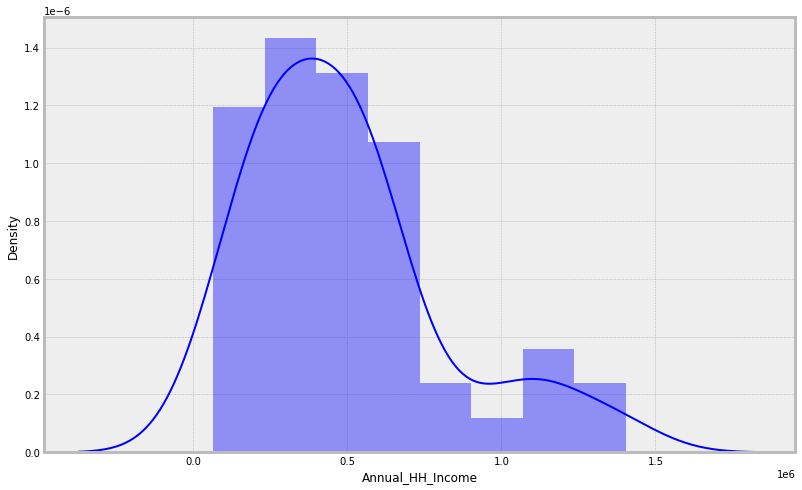

In [45]:
plt.figure(figsize=(12,8))
sns.distplot(df["Annual_HH_Income"],color="blue")

### Conclusion:
>As we can see from the above Graph , The dats is not forming an Accurate bell shaped curve , which means the Given data is not Normally Distributed .

# Q-Q Plots
In Statistics, Q-Q(quantile-quantile) plots play a very vital role to graphically analyze and compare two probability distributions by plotting their quantiles against each other. If the two distributions which we are comparing are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line y = x.
>***“Draw graph, draw line, tell me if you think it's fine!” — Josh Starmer***

Yes, it's just that simple. Being a data scientist or in general a statistician, it’s very important for you to know whether the distribution is normal or not so as to apply various statistical measures on the data and interpret it in much more human-understandable visualization and there Q-Q plot comes into the picture. The most fundamental question answered by Q-Q plot is:
>***Is this curve Normally Distributed?***

![](https://miro.medium.com/max/450/1*jSTbWzq192boua2_w0RZJg.png)
#### Normally distributed, but why?
Q-Q plots are used to find the type of distribution for a random variable whether it be a Gaussian Distribution, Uniform Distribution, Exponential Distribution or even Pareto Distribution, etc. You can tell the type of distribution using the power of the Q-Q plot just by looking at the plot. In general, we are talking about Normal distributions only because we have a very beautiful concept of 68–95–99.7 rule which perfectly fits into the normal distribution So we know how much of the data lies in the range of first standard deviation, second standard deviation and third standard deviation from the mean. So knowing if a distribution is Normal opens up new doors for us to experiment with the data easily. Secondly, Normal Distributions occur very frequently in most of the natural events which have a vast scope.
#### How does it work? 
 If the points at the ends of the curve formed from the points are not falling on a straight line but indeed are scattered significantly from the positions then we cannot conclude a relationship between the x and y axes which clearly signifies that our ordered values which we wanted to calculate are not Normally distributed.
 
 ![](https://miro.medium.com/max/512/1*_wuWDNGs3hB2K0_kgpoc1A.jpeg)
If all the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is Normally distribution because it is evenly aligned with the standard normal variate which is the simple concept of Q-Q plot.
#### Skewed Q-Q plots
  ##### Left-skewed Q-Q plots
 - If the bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution has a longer tail to its left or simply it is left-skewed (or negatively skewed).
![](https://miro.medium.com/max/700/1*aiUmkCQ5451VQa1JYXQioA.png) 
 ##### Right-skewed Q-Q plots
 - when we see the upper end of the Q-Q plot to deviate from the straight line and the lower and follows a straight line then the curve has a longer till to its right and it is right-skewed (or positively skewed).
 ![](https://miro.medium.com/max/700/1*XGMMcZdBxPTK5K_MW7jNVA.png)
##### FAT-Tailed Q-Q plots
 - The distribution with a fat tail will have both the ends of the Q-Q plot to deviate from the straight line and its center follows a straight line.
 ![](https://miro.medium.com/max/700/1*Z50lOJN5MGeWfH4h82Br_g.png)
##### Thin-Tailed Q-Q plots 
 - whereas a thin-tailed distribution will form a Q-Q plot with a very less or negligible deviation at the ends thus making it a perfect fit for the Normal Distribution.
 ![](https://miro.medium.com/max/700/1*-XKT7Xx0-BaxB2mLnq5b3A.png)

In [46]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [47]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


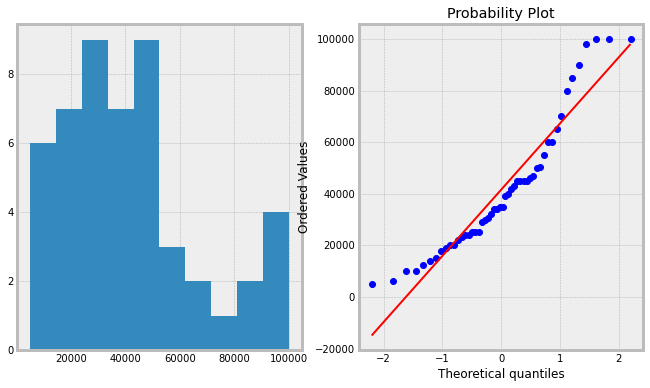

In [48]:
plot_data(df,'Mthly_HH_Income')

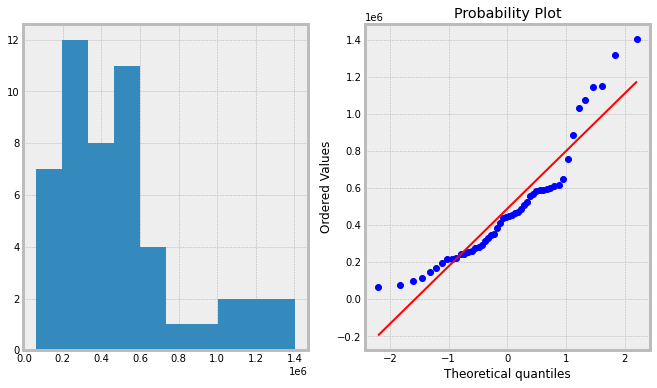

In [49]:
plot_data(df,'Annual_HH_Income')

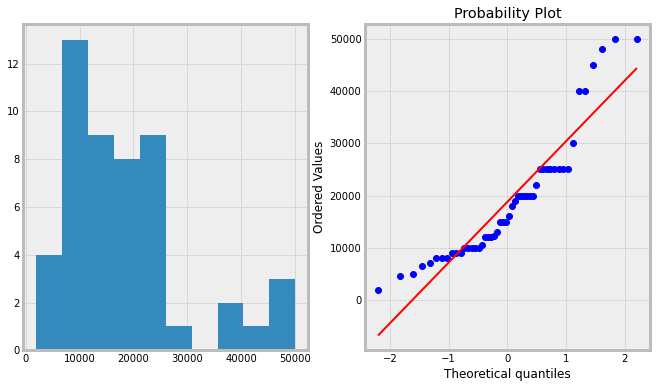

In [50]:
plot_data(df,'Mthly_HH_Expense')

### 10. Box Cox Transformation
Definition : The Box-Cox transformation is defined as:

$T(Y)=(Y exp(λ)−1)/λ$

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

Examples:

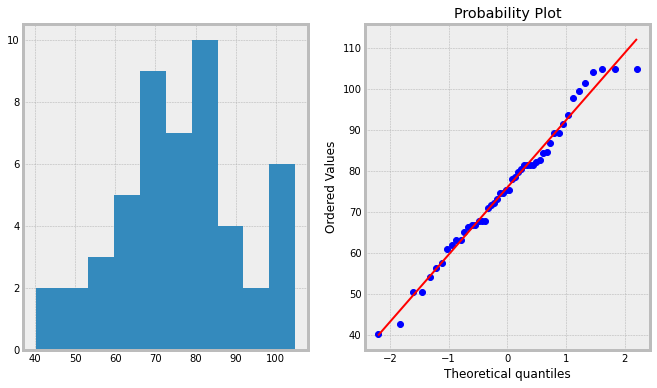

In [51]:
df['Mthly_HH_Income_box'],parameters=stat.boxcox(df['Mthly_HH_Income'])
plot_data(df,'Mthly_HH_Income_box')